## Figure 3

This manuscript generates figure 3 and relavent data of the paper. 

Kexin Dong

May 27, 2024  

In [2]:
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## 3d 



In [7]:
import bioh2m as h2m
import pandas as pd
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
# remember to replace the paths with yours
records_h, index_list_h = h2m.genome_loader(path_h_ref)
records_m, index_list_m  = h2m.genome_loader(path_m_ref)
path_h_anno, path_m_anno = '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_v19_GRCh37.db', '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h, db_m = h2m.anno_loader(path_h_anno), h2m.anno_loader(path_m_anno)

In [3]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned_v3.csv')
k = df_binded[(df_binded['gene_name_h']=='KDM6A')]
del df_binded

In [ ]:
h2m.model()

In [11]:
result = h2m.model(records_h,index_list_h, records_m, index_list_m, db_h, db_m, 'ENST00000377967.4', 'ENSMUST00000052368.9', 44922802, 44922802, 'C','T', ty_h = 'SNP', ver = 37, show_sequence = True)
pd.DataFrame(result).T

,0
gene_name_h,KDM6A
gene_id_h,ENSG00000147050.10
tx_id_h,ENST00000377967.4
chr_h,chrX
exon_num_h,29
strand_h,+
match,True
start_h,44922802
end_h,44922802
ref_seq_h,C


In [25]:
h2m.Translate(result[0]['new_seq_h'])[554-10:558]

Seq('LALTRVPSVS*PGV')

In [76]:
h2m.Translate(result[0]['new_seq_m'])[554-10:558]

Seq('LPLTRMPSVS*PGV')

In [92]:
result_m_i = pd.read_csv(f'/Users/kexindong/Documents/GitHub/Output/neoantigen/utx_m.txt', header=0, sep='\t', comment="#")
result_h_i = pd.read_csv(f'/Users/kexindong/Documents/GitHub/Output/neoantigen/utx_h.txt', header=0, sep='\t', comment="#")

In [93]:
result_h_i['allele'] = [x[4:] for x in result_h_i['allele']]
result_h_i['allele'] = [''.join(str(x).split('*')) for x in result_h_i['allele']]

In [105]:
result_m_i['peptide'] = ['LALTRVPSV']*4 + ['ALTRVPSVS']*4 

In [94]:
result_m_i['allele'] = [x[4:] for x in result_m_i['allele']]
# result_m_i['allele'] = [''.join(str(x).split('*')) for x in result_m_i['allele']]

In [96]:
k = result_h_i.rename(columns={'peptide':'peptide',
                                'allele':'HLA_observed',
                                'percentile_rank':'percentile_rank_h'})[['HLA_observed','peptide','score','percentile_rank_h']]

In [106]:
result_m_i

,allele,seq_num,start,end,length,peptide,score,percentile_rank
0,Kb,1,1,9,9,LALTRVPSV,0.026249,3.5
1,Kd,1,1,9,9,LALTRVPSV,0.007848,5.5
2,Db,1,1,9,9,LALTRVPSV,0.005764,7.3
3,Dd,1,1,9,9,LALTRVPSV,0.002074,7.0
4,Kd,1,2,10,9,ALTRVPSVS,0.000066,55.0
5,Kb,1,2,10,9,ALTRVPSVS,0.000019,84.0
6,Db,1,2,10,9,ALTRVPSVS,0.000015,78.0
7,Dd,1,2,10,9,ALTRVPSVS,0.000003,83.0


In [107]:
l = pd.merge(k,result_m_i[['allele','peptide','score','percentile_rank']].rename(columns={'peptide':'peptide',
                                                                                                           'allele':'HLA_observed_m',
                                                                                                           'percentile_rank':'percentile_rank_m',
                                                                                                           'score':'score_m'}),how='left', on = 'peptide')

In [56]:
def dict_score_class(h,m):
    if h <= 2 and m <=2:
        return 'both'
    elif m>2:
        if h<=2:
            return 'honly'
        else:
            return 'neither'
    else:
        return 'monly'
    
dict_color_class = {
    'both':'darkred',
    'honly':'tab:orange',
    'monly':'tab:blue',
    'neither':'grey'
}

In [108]:
l['class'] = [dict_score_class(h,m) for h,m in zip(l['percentile_rank_h'], l['percentile_rank_m'])]
l['color'] = [dict_color_class[x] for x in l['class'] ]

In [109]:
l

,HLA_observed,peptide,score,percentile_rank_h,HLA_observed_m,score_m,percentile_rank_m,class,color
0,B51:01,LALTRVPSV,0.727192,0.06,Kb,0.026249,3.5,honly,tab:orange
1,B51:01,LALTRVPSV,0.727192,0.06,Kd,0.007848,5.5,honly,tab:orange
2,B51:01,LALTRVPSV,0.727192,0.06,Db,0.005764,7.3,honly,tab:orange
3,B51:01,LALTRVPSV,0.727192,0.06,Dd,0.002074,7.0,honly,tab:orange
4,B08:01,LALTRVPSV,0.483426,0.16,Kb,0.026249,3.5,honly,tab:orange
...,...,...,...,...,...,...,...,...,...
203,B53:01,ALTRVPSVS,0.000010,51.00,Dd,0.000003,83.0,neither,grey
204,B35:03,ALTRVPSVS,0.000009,42.00,Kd,0.000066,55.0,neither,grey
205,B35:03,ALTRVPSVS,0.000009,42.00,Kb,0.000019,84.0,neither,grey
206,B35:03,ALTRVPSVS,0.000009,42.00,Db,0.000015,78.0,neither,grey


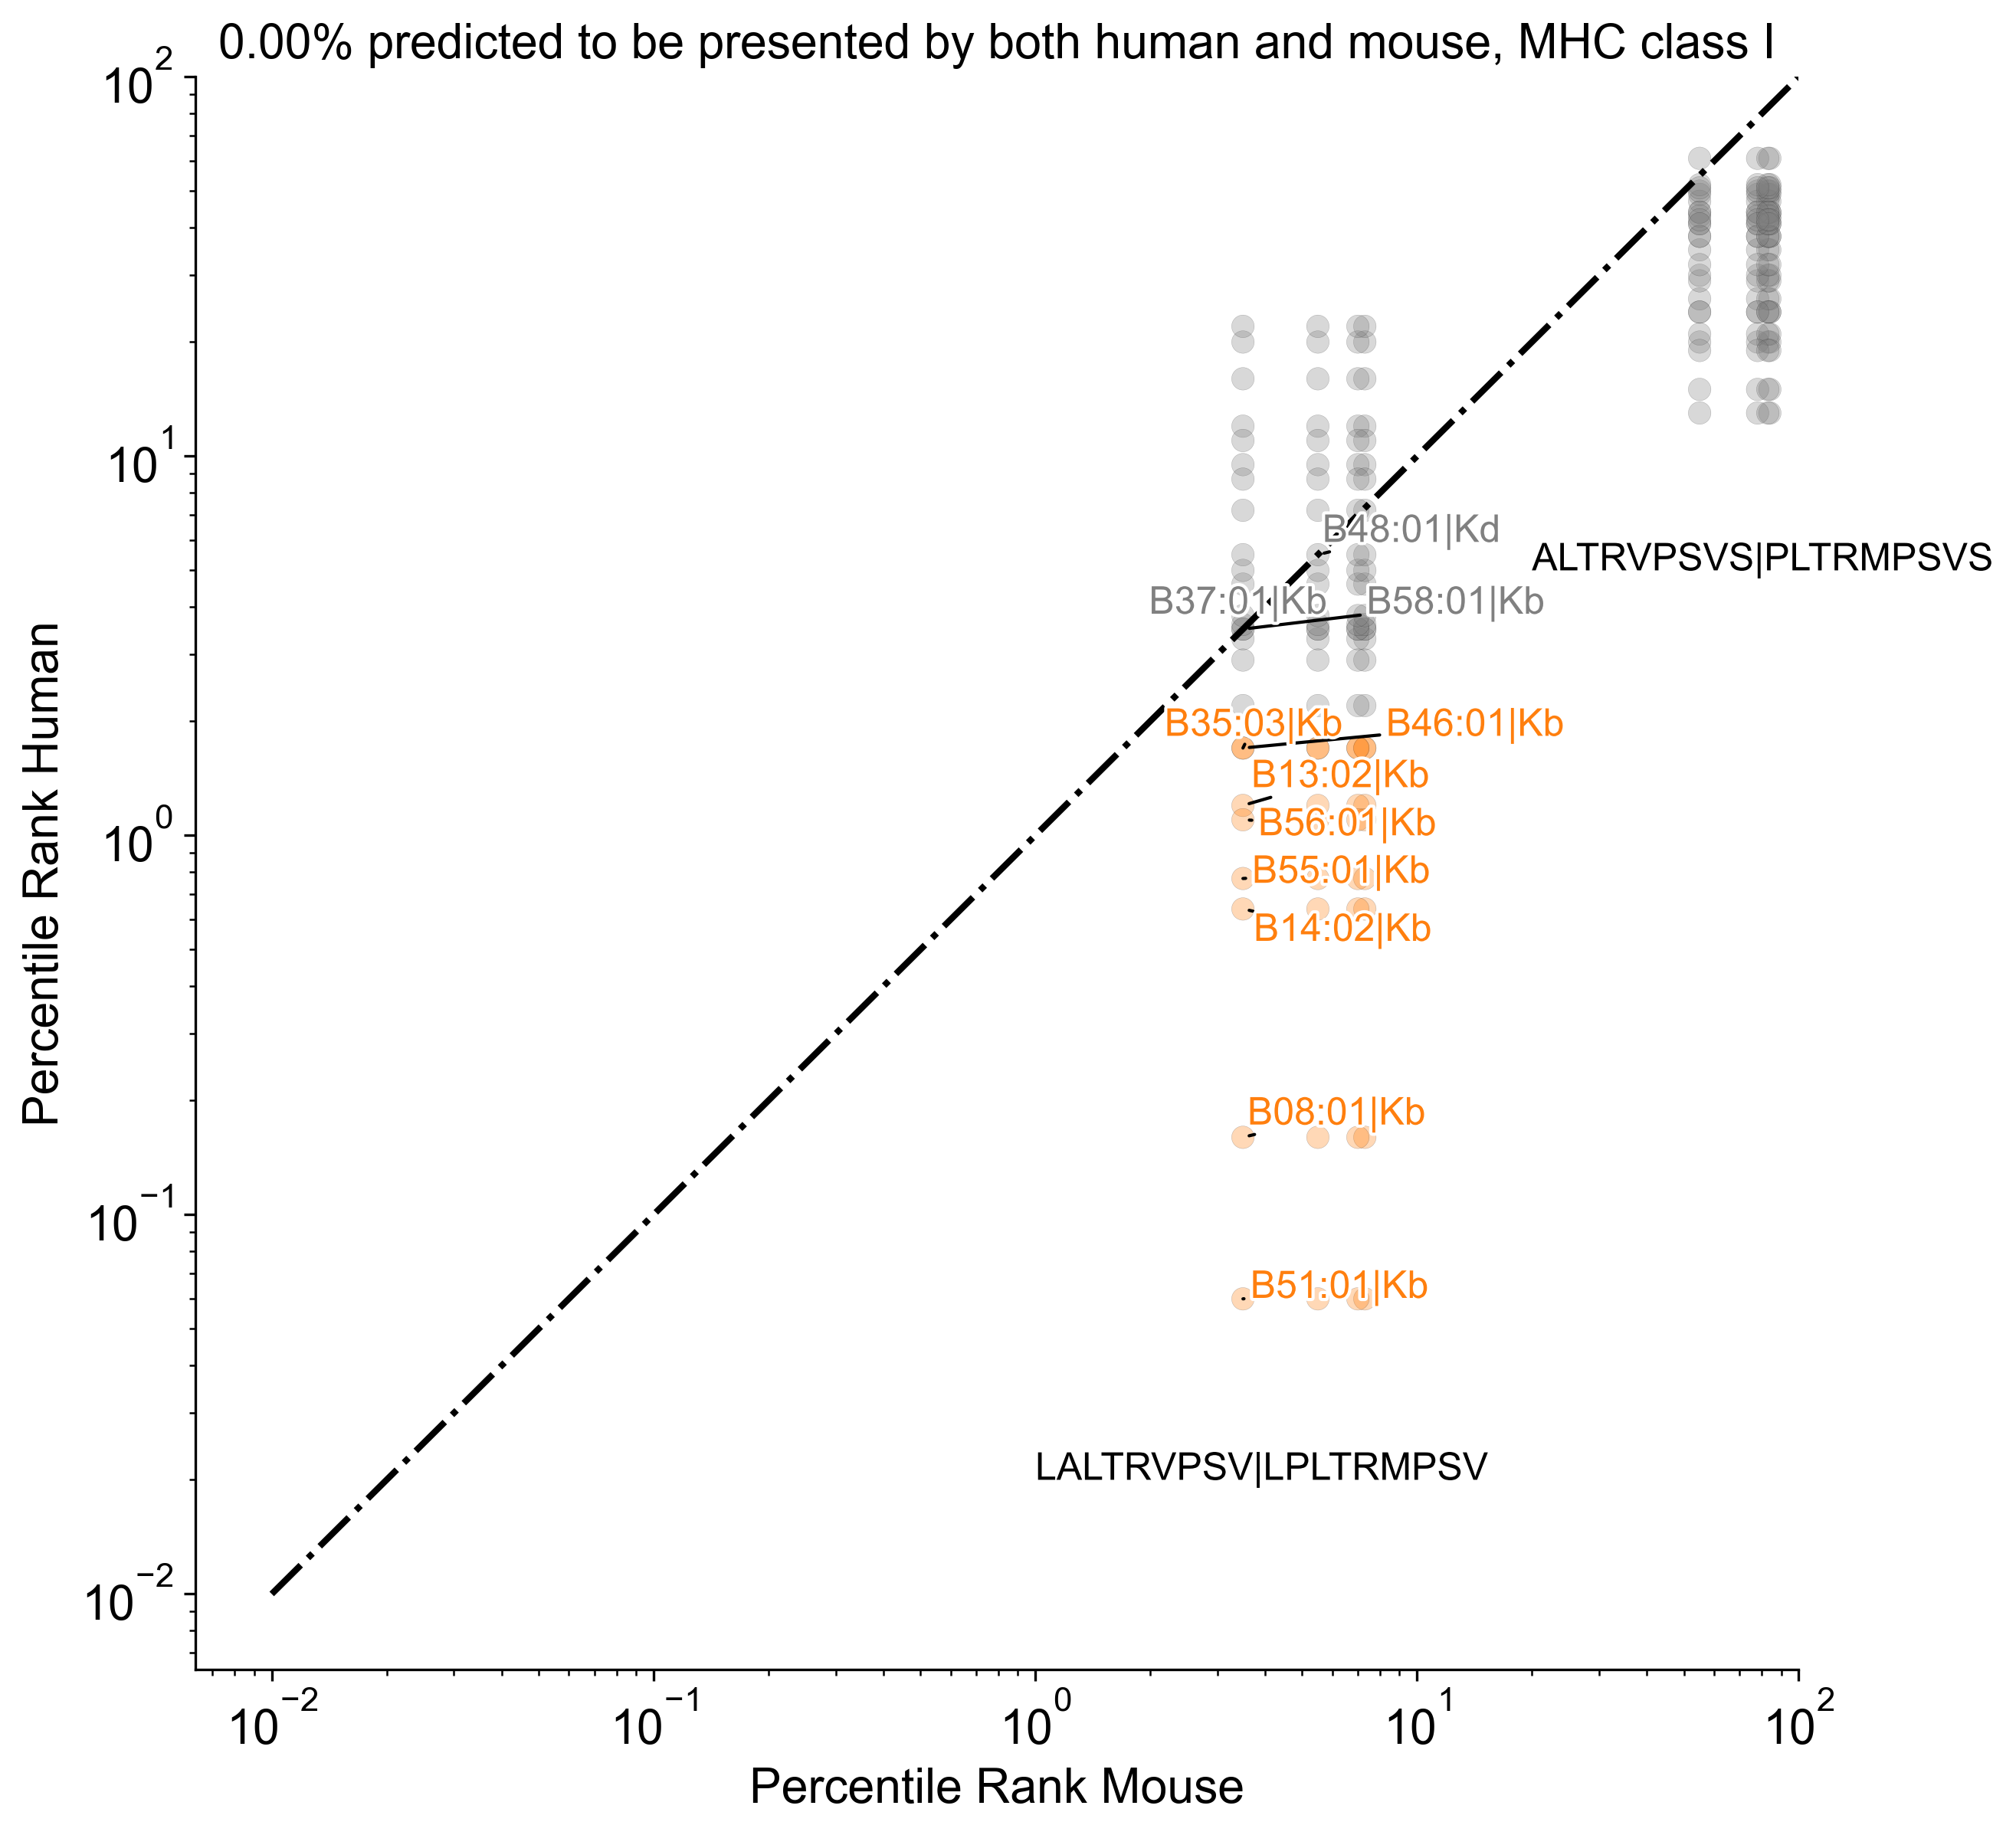

In [111]:
l_plot = l
bbb1 = l_plot[[abs(x-y)<=0.05 for x,y in zip(l_plot['percentile_rank_m'],l_plot['percentile_rank_h'])]]
bbb2 = l_plot[(l_plot['percentile_rank_h'] <= 2) & (l_plot['percentile_rank_m'] <= 5)]
# bbb2 = l_plot[(l_plot['percentile_rank_h'] <= 2) & (l_plot['percentile_rank_m'] <= 2)]
# top_2 = df_merged['HGVSp_h'].value_counts().index.to_list()[:2]
# bbb3 = df_merged[df_merged['HGVSp_h'].isin(top_2)]
bb2 = pd.concat((bbb1, bbb2))

x = list(bb2['percentile_rank_m'])
y = list(bb2['percentile_rank_h'])
t = ['|'.join([x,y]) for x,y in zip(bb2['HLA_observed'], bb2['HLA_observed_m'])]
c = list(bb2['color'])

fig, ax = plt.subplots(figsize=(9, 9), dpi=300)
ax.scatter(data=l_plot, x='percentile_rank_m', y='percentile_rank_h', c = 'color',alpha=.3, s=50, edgecolor='black', linewidths=.1)
plt.xscale('log')
plt.yscale('log')
ax.plot([0.01, 100], [.01, 100], linewidth=2, linestyle='-.', color='black')

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_ylabel(f"Percentile Rank Human", fontsize=15)
ax.set_xlabel("Percentile Rank Mouse", fontsize=15)

l_1 = len(l_plot)
l_2 = len(l_plot[l_plot['class']=='both'])
per=l_2/l_1*100
ax.set_title(f"{per:.2f}% predicted to be presented by both human and mouse, MHC class I", fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)

texts = [ax.text(x[i],y[i],t[i], fontsize=12, color=c[i], 
         path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))

xx = [1,20]
yy = [0.02,5]
tt = ['LALTRVPSV|LPLTRMPSV','ALTRVPSVS|PLTRMPSVS']
text_2 = [ax.text(xx[i],yy[i],tt[i], fontsize=12,
         path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(xx))]

# plt.savefig('/Users/kexindong/Documents/GitHub/Output/neoantigen/final_result/best_h2m.svg')
plt.show()